## Nhập thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm
from dateutil import parser
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split,
    StratifiedShuffleSplit,
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
)
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Tạo thư viện rỗng để chứa thông tin BĐS cần đánh giá 

In [115]:
# Tạo thư viện rỗng
dict_client = {}

In [116]:
# Nhập thông tin bất động sản cần đánh giá
dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 1  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 1
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

## Lấy data

In [27]:
data = pd.read_csv('/Users/namtuyen/Downloads/Năm học/Kì 1 năm 3/Data mining/Final/Case 5 - AirBnB Prices/airbnb.csv')

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_66235/1506507258.py:1: DtypeWarning: Columns (37,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/namtuyen/Downloads/Năm học/Kì 1 năm 3/Data mining/Final/Case 5 - AirBnB Prices/airbnb.csv')


In [28]:
data

,Unnamed: 0,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27065,27065,22708135,https://www.airbnb.com/rooms/22708135,"Brand new hotel in Broadway, Sydney!",Brand new hotel just across the street from be...,Brand new hotel just opened next to Broadway s...,Brand new hotel just across the street from be...,NaN,NaN,NaN,...,10.0,9.0,9.0,9.0,t,strict_14_with_grace_period,f,f,2,2.97
27066,27066,22708238,https://www.airbnb.com/rooms/22708238,Beautiful home with 2 furnished room.,"One private Master bedroom, furnished and has ...","kitchen, Tv lounge,BBQ area,Laundry.","One private Master bedroom, furnished and has ...",Nice and quite street with not even a single a...,NaN,Wiley Park train station is 5 minutes walk.35 ...,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,1,NaN
27067,27067,22709306,https://www.airbnb.com/rooms/22709306,2BR Capacious Apt at Darling Harbour Free parking,‚ô° 2 Bedroom and 2 Bathroom ‚ô° In the heart ...,** Minutes walk to: ‚ô° Darling Harbour ‚ô° IC...,‚ô° 2 Bedroom and 2 Bathroom ‚ô° In the heart ...,There‚Äôs really nowhere in the world quite li...,This apartment is designed to accommodate up t...,TRAVEL FROM THE AIRPORT - Either Uber or Taxis...,...,9.0,9.0,10.0,9.0,t,moderate,f,f,7,1.51
27068,27068,22709315,https://www.airbnb.com/rooms/22709315,Prime Location- 3Bedrm HOUSE- Walk 10mins to city,Positioned in one of Sydney's trendiest hotspo...,"- less than 3kilometres is Sydney CBD, Paddys ...",Positioned in one of Sydney's trendiest hotspo...,Conveniently located near the Sydney CBD the h...,The house is not be suitable for elderly guest...,It is actually more conve

## Xử lí dữ liệu

In [29]:
# Lấy ra các yếu tố dùng để xây dựng mô hình đánh giá
feature = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee","accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", "host_is_superhost","host_since","cancellation_policy"]
data = data[feature]

In [30]:
data

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27065,$101.00,Glebe,151.194421,-33.883947,96.0,17,1,$200.00,$0.00,2,1.0,0.0,1.0,Other,Entire home/apt,25,t,f,16/02/17,strict_14_with_grace_period
27066,$40.00,Wiley Park,151.064296,-33.923985,NaN,0,3,NaN,NaN,2,1.5,1.0,1.0,House,Private room,0,f,f,12/01/18,strict_14_with_grace_period
27067,$169.00,Pyrmont,151.197017,-33.873479,90.0,8,1,$300.00,$80.00,6,2.0,2.0,4.0,Apartment,Entire home/apt,97,f,f,11/01/18,moderate
27068,$98.00,Redfern,151.207475,-33.890265,97.0,28,1,$400.00,$120.00,11,1.0,3.0,7.0,House,Entire home/apt,198,f,f,13/01/18,strict_14_with_grace_period


In [31]:
# Chọn ra những cột có dữ liệu là số tiền từ dạng string về float
price_list = ["price", "cleaning_fee", "security_deposit"]

In [32]:
# Xử lí những cột có dữ liệu là số tiền từ dạng string về float
for col in price_list:
    data[col] = data[col].fillna("0")
    data[col] = data[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_66235/3256800712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna("0")
/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_66235/3256800712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)


In [33]:
# Kiểm tra ngày tháng cột host_since
data['host_since'] 

0        23/09/09
1        14/05/09
2        20/11/09
3        30/11/09
4        30/11/09
           ...   
27065    16/02/17
27066    12/01/18
27067    11/01/18
27068    13/01/18
27069    13/12/14
Name: host_since, Length: 27070, dtype: object

In [34]:
# Chuyển đổi cột ngày tháng host_since sang định dạng datetime
data['host_since'] = pd.to_datetime(data['host_since'])

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_66235/280674637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['host_since'] = pd.to_datetime(data['host_since'])


In [35]:
data['host_since']

0       2009-09-23
1       2009-05-14
2       2009-11-20
3       2009-11-30
4       2009-11-30
           ...    
27065   2017-02-16
27066   2018-12-01
27067   2018-11-01
27068   2018-01-13
27069   2014-12-13
Name: host_since, Length: 27070, dtype: datetime64[ns]

<Axes: >

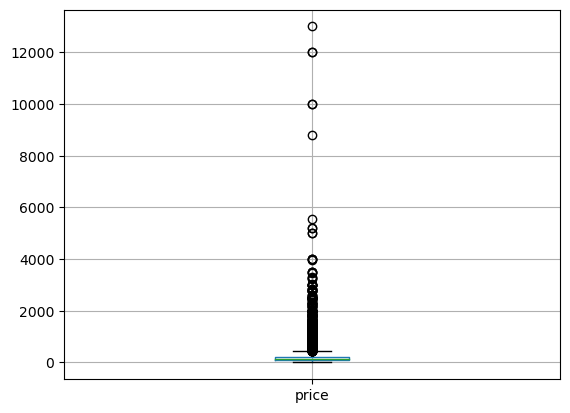

In [36]:
# Kiểm tra outlier của giá thuê
data.boxplot(column="price")

In [37]:
# Kiểm tra tính đối xứng của dữ liệu cột Price
data["price"].skew()

13.808558337216192

Box plot bị lệch dương vì một số nhỏ những căn nhà có giá trị quá cao dẫn tới trung bình lớn hơn nhiều so với trung vị

In [38]:
# Kiểm tra giá trị max của cột Price
data["price"].max()

12999.0

In [39]:
# Lấy phân vị thứ 99,5% để xác định ngưỡng cho các điểm dữ liệu ngoại lệ hoặc rất khác biệt so với phần lớn dữ liệu còn lại
data["price"].quantile(0.995)

1600.0

In [40]:
# Loại bỏ các giá trị ngoại lai trên phân vị 99,5%
data = data[data["price"]<data["price"].quantile(0.995)].reset_index(drop=True)

In [41]:
# Kiểm tra lại
data["price"].skew()

2.957872457159033

Tạm chấp nhận mức độ lệch của dữ liệu

In [42]:
# Kiểm tra số lượng cột bị null
data.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [43]:
# Kiểm tra thoong tin dữ liệu
data.info

<bound method DataFrame.info of        price         city   longitude   latitude  review_scores_rating  \
0       65.0  Potts Point  151.226562 -33.869168                  92.0   
1       98.0      Pyrmont  151.191896 -33.865153                  95.0   
2      469.0    Balgowlah  151.261722 -33.800929                 100.0   
3       63.0      Redfern  151.200450 -33.890765                  89.0   
4       39.0      Redfern  151.200896 -33.889667                  90.0   
...      ...          ...         ...        ...                   ...   
26926  101.0        Glebe  151.194421 -33.883947                  96.0   
26927   40.0   Wiley Park  151.064296 -33.923985                   NaN   
26928  169.0      Pyrmont  151.197017 -33.873479                  90.0   
26929   98.0      Redfern  151.207475 -33.890265                  97.0   
26930  119.0   Paddington  151.219972 -33.882840                  90.0   

       number_of_reviews  minimum_nights  security_deposit  cleaning_fee  \
0  

In [44]:
# Số ngày trống của các phòng trong bộ dữ liệu
data["availability_365"].value_counts()

0      11492
365      743
364      476
89       414
90       324
       ...  
214       11
230       11
259       10
100       10
226        9
Name: availability_365, Length: 366, dtype: int64

In [45]:
# Mô tả dữ liệu
data.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [46]:
# Thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   review_scores_rating    19465 non-null  float64       
 5   number_of_reviews       26931 non-null  int64         
 6   minimum_nights          26931 non-null  int64         
 7   security_deposit        26931 non-null  float64       
 8   cleaning_fee            26931 non-null  float64       
 9   accommodates            26931 non-null  int64         
 10  bathrooms               26909 non-null  float64       
 11  bedrooms                26923 non-null  float64       
 12  beds                    26898 non-null  float6

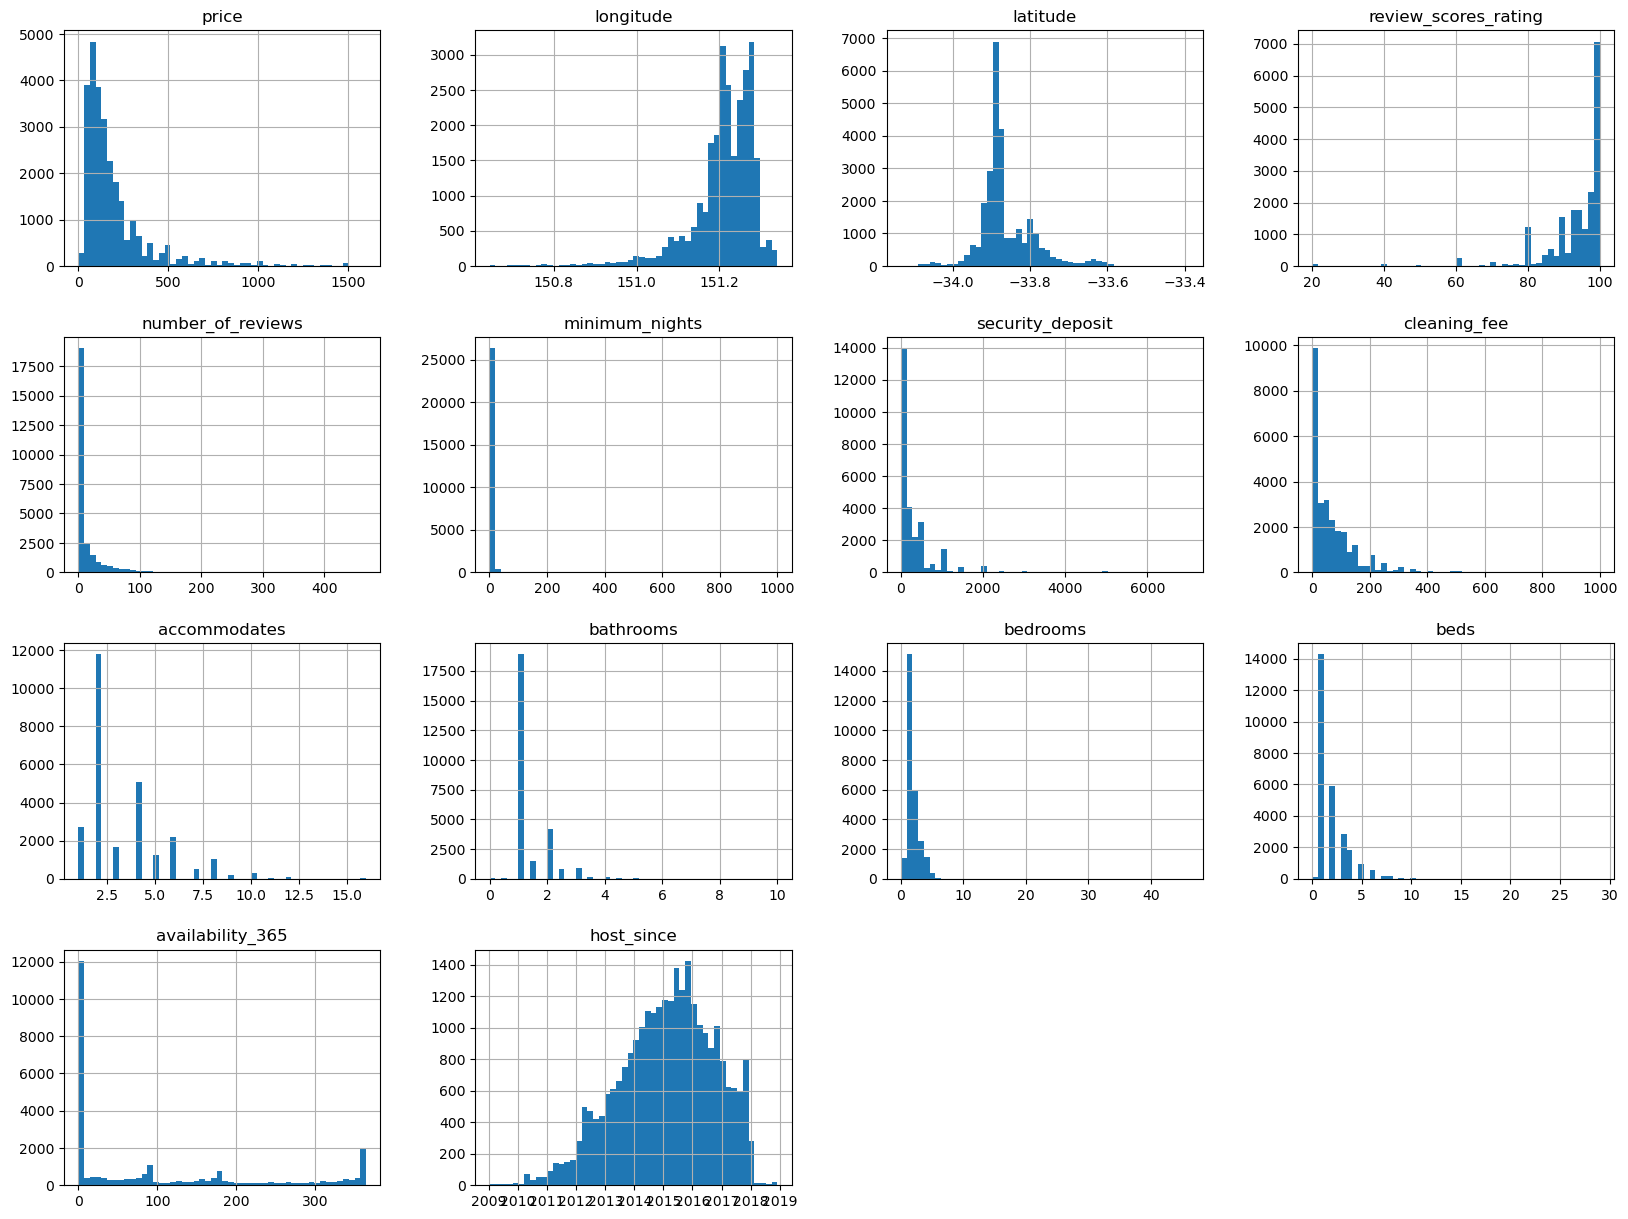

In [47]:
# Vẽ biểu đồ histogram cho mỗi cột số trong DataFrame
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [48]:
# số lượng của các khu vực cho thuê
data["city"].value_counts().head(10)

Bondi Beach     1671
Manly            958
Surry Hills      919
Bondi            785
Randwick         684
Sydney           682
Coogee           675
Darlinghurst     660
North Bondi      629
Newtown          490
Name: city, dtype: int64

In [49]:
# Lọc ra top 20 địa điểm được thuê nhiều nhất
list_of_20 = list(data["city"].value_counts().head(10).index)
data = data[data["city"].isin(list_of_20)].reset_index(drop=True)

In [50]:
# Số lượng của từng loại BĐS
data["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Bungalow                 7
Boutique hotel           6
Cottage                  6
Tent                     6
Tiny house               5
Resort                   5
Hotel                    3
Cabin                    2
Yurt                     1
Camper/RV                1
Chalet                   1
Aparthotel               1
Earth house              1
Houseboat                1
Name: property_type, dtype: int64

In [51]:
# Loại bỏ các mô hình BĐS có số lượng thấp
item_counts = data.groupby(['property_type']).size()
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

In [52]:
data = data[~data["property_type"].isin(rare_items)].reset_index(drop=True)

In [53]:
data

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,t,t,2010-08-14,strict_14_with_grace_period
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,t,f,2010-04-26,strict_14_with_grace_period
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,t,f,2010-04-26,strict_14_with_grace_period
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,t,t,2012-01-18,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,156.0,Bondi,151.270708,-33.896784,NaN,0,1,0.0,0.0,6,2.0,3.0,3.0,Apartment,Entire home/apt,0,f,f,2017-11-09,flexible
8103,65.0,Randwick,151.242108,-33.916868,100.0,4,1,0.0,50.0,1,1.0,1.0,1.0,Apartment,Private room,278,f,f,2014-04-04,flexible
8104,50.0,Darlinghurst,151.222579,-33.876381,80.0,1,7,0.0,0.0,1,1.5,5.0,1.0,House,Private room,0,t,f,2013-03-11,flexible
8105,128.0,Surry Hills,151.209611,-33.881581,91.0,21,2,200.0,121.0,4,1.0,1.0,2.0,Apartment,Entire home/apt,77,t,f,2017-02-21,strict_14_with_grace_period


## Xử lí dữ liệu để chạy thuật toán

In [54]:
# Cài đặt seed cố định để đảm bảo kết quả không thay đổi giữa các lần chạy thuật toán
np.random.seed(1)

## Chia dữ liệu theo Stratified sampling để đảm bảo tính đại diện

In [55]:
# Tạo mã hóa city_code từ cột city
le = LabelEncoder()
data["city_code"] = le.fit_transform(data["city"])

In [56]:
# Tạo một đối tượng StratifiedShuffleSplit để phân chia dữ liệu một cách chiến lược
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [57]:
# Sử dụng StratifiedShuffleSplit để phân chia dữ liệu. Dữ liệu được chiếu theo mã thành phố
for train_index, test_index in split.split(data, data["city_code"]):
    del data["city_code"]  # Xóa cột city_code sau khi đã sử dụng để tránh rò rỉ dữ liệu
    strat_train_set = data.loc[train_index]  # Tạo tập huấn luyện chiến lược
    strat_test_set = data.loc[test_index]  # Tạo tập kiểm tra chiến lược

In [58]:
# Tách dữ liệu huấn luyện và kiểm tra
X_train = strat_train_set.drop(columns=["price"])  # Loại bỏ cột "price" để làm X_train
y_train = strat_train_set["price"]  # Cột "price" làm nhãn mục tiêu

X_test = strat_test_set.drop(columns=["price"])  # Loại bỏ cột "price" để làm X_test
y_test = strat_test_set["price"]  # Cột "price" làm nhãn mục tiêu

In [59]:
strat_test_set

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
1098,110.0,Darlinghurst,151.219597,-33.876213,NaN,0,2,250.0,50.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,f,f,2014-07-16,moderate
4811,225.0,Manly,151.288501,-33.806436,100.0,1,3,750.0,219.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,0,f,f,2012-09-18,strict_14_with_grace_period
3678,91.0,Bondi Beach,151.277634,-33.888887,NaN,0,3,200.0,25.0,1,1.0,1.0,1.0,Apartment,Private room,0,t,f,2013-10-14,strict_14_with_grace_period
2982,45.0,Bondi Beach,151.281182,-33.889755,84.0,25,7,400.0,50.0,2,1.0,1.0,1.0,Other,Private room,361,t,f,2015-05-07,strict_14_with_grace_period
5140,115.0,Manly,151.282273,-33.793341,100.0,14,1,0.0,0.0,2,1.0,1.0,1.0,House,Private room,19,t,f,2016-10-22,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,106.0,Bondi Beach,151.271970,-33.886254,NaN,0,7,0.0,30.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,t,f,2017-06-01,moderate
4027,460.0,Sydney,151.203807,-33.868047,90.0,2,7,500.0,250.0,6,2.5,3.0,4.0,Apartment,Entire home/apt,348,f,f,2014-05-13,strict_14_with_grace_period
500,250.0,Manly,151.283801,-33.807596,94.0,50,7,300.0,0.0,3,1.0,2.0,2.0,Apartment,Entire home/apt,20,t,f,2013-09-17,strict_14_with_grace_period
2414,80.0,Sydney,151.256497,-33.898580,80.0,1,21,0.0,70.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,1,f,f,2014-08-31,strict_14_with_grace_period


In [60]:
# Tính giá trung bình theo từng khu vực trong tập kiểm tra
average_prices = strat_test_set.groupby("city")["price"].mean()

In [61]:
average_prices

city
Bondi           198.745223
Bondi Beach     199.879880
Coogee          196.574627
Darlinghurst    184.700000
Manly           223.447368
Newtown         117.938776
North Bondi     248.857143
Randwick        178.072993
Surry Hills     175.732240
Sydney          193.962687
Name: price, dtype: float64

## Mô hình hóa để tìm ra insight trong dữ liệu

In [62]:
# Khởi tạo một bản sao từ tập huấn luyện để thực hiện phân tích và trực quan hóa
insight = strat_train_set.copy()

In [63]:
insight

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
5484,200.0,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,House,Entire home/apt,127,t,f,2016-01-22,moderate
1267,183.0,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,Apartment,Private room,0,t,f,2014-03-28,moderate
6658,175.0,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,t,f,2014-01-09,strict_14_with_grace_period
2522,85.0,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,90,f,f,2015-11-22,flexible
722,80.0,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,Apartment,Private room,0,t,f,2014-01-07,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,700.0,Coogee,151.248745,-33.922954,100.0,1,5,500.0,100.0,8,2.0,4.0,4.0,House,Entire home/apt,0,f,f,2017-03-24,strict_14_with_grace_period
3500,501.0,North Bondi,151.276397,-33.882302,100.0,2,5,500.0,200.0,8,3.0,3.0,3.0,House,Entire home/apt,0,t,f,2016-01-15,flexible
485,119.0,Bondi,151.260641,-33.891914,96.0,7,5,250.0,30.0,2,1.0,1.0,1.0,Apartment,Private room,187,t,f,2013-03-11,moderate
3146,111.0,Manly,151.281315,-33.792815,NaN,0,1,0.0,50.0,2,1.0,1.0,1.0,Apartment,Private room,364,f,f,2015-07-01,strict_14_with_grace_period


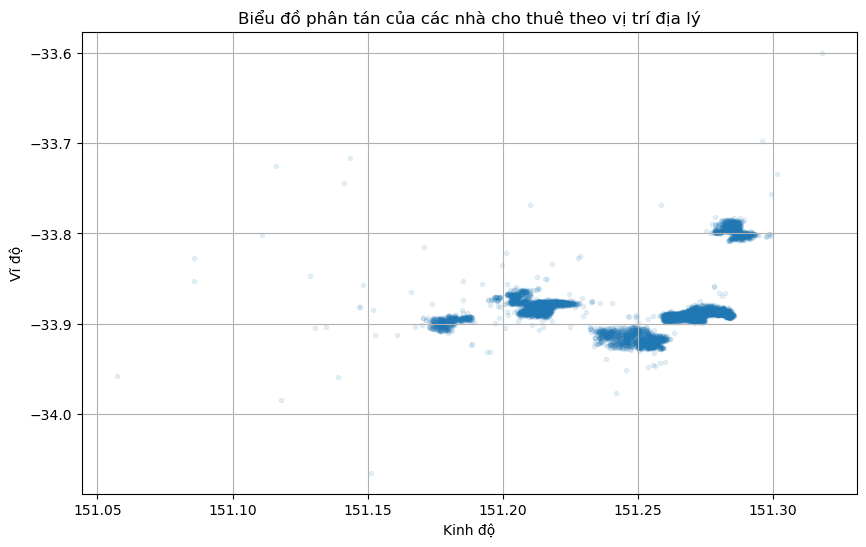

In [64]:
# Vẽ biểu đồ scatter với longitude và latitude
plt.figure(figsize=(10, 6))
plt.scatter(insight['longitude'], insight['latitude'], alpha=0.1, marker='.')
plt.title('Biểu đồ phân tán của các nhà cho thuê theo vị trí địa lý')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True)
plt.show()

In [65]:
# Lọc dữ liệu để loại bỏ các giá trị ngoài khu vực địa lý cụ thể và giới hạn giá dưới 600
insight = insight[(insight["longitude"] > 151.16) & (insight["latitude"] < -33.75)]
insight = insight[insight["latitude"] > -33.95]
insight = insight[insight["price"] < 600]

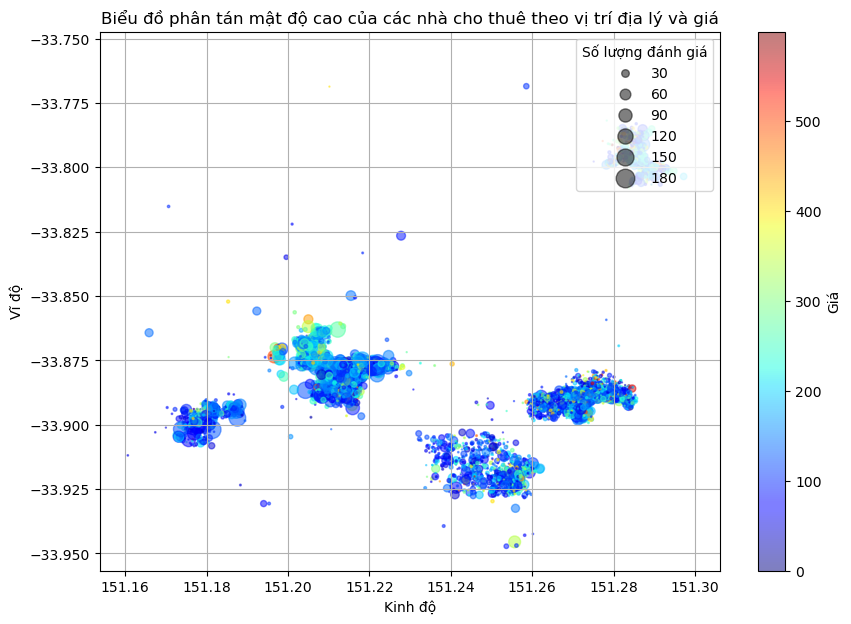

In [66]:
# Vẽ biểu đồ scatter với longitude và latitude
plt.figure(figsize=(10, 7))
sc = plt.scatter(insight['longitude'], insight['latitude'], alpha=0.5,
                 s=insight['number_of_reviews']/2,  # Kích thước điểm dựa trên số lượng đánh giá
                 c=insight['price'],  # Màu sắc dựa trên giá
                 cmap='jet',  # Sử dụng bảng màu 'jet'
                 marker='o')
plt.colorbar(sc, label='Giá')
plt.title('Biểu đồ phân tán mật độ cao của các nhà cho thuê theo vị trí địa lý và giá')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True)
plt.legend(*sc.legend_elements("sizes", num=6), title="Số lượng đánh giá", loc="upper right")
plt.show()

In [67]:
# Chọn các cột số
numeric_insight = insight.select_dtypes(include='number')

In [68]:
# Tính toán ma trận tương quan
corr_matrix = numeric_insight.corr()

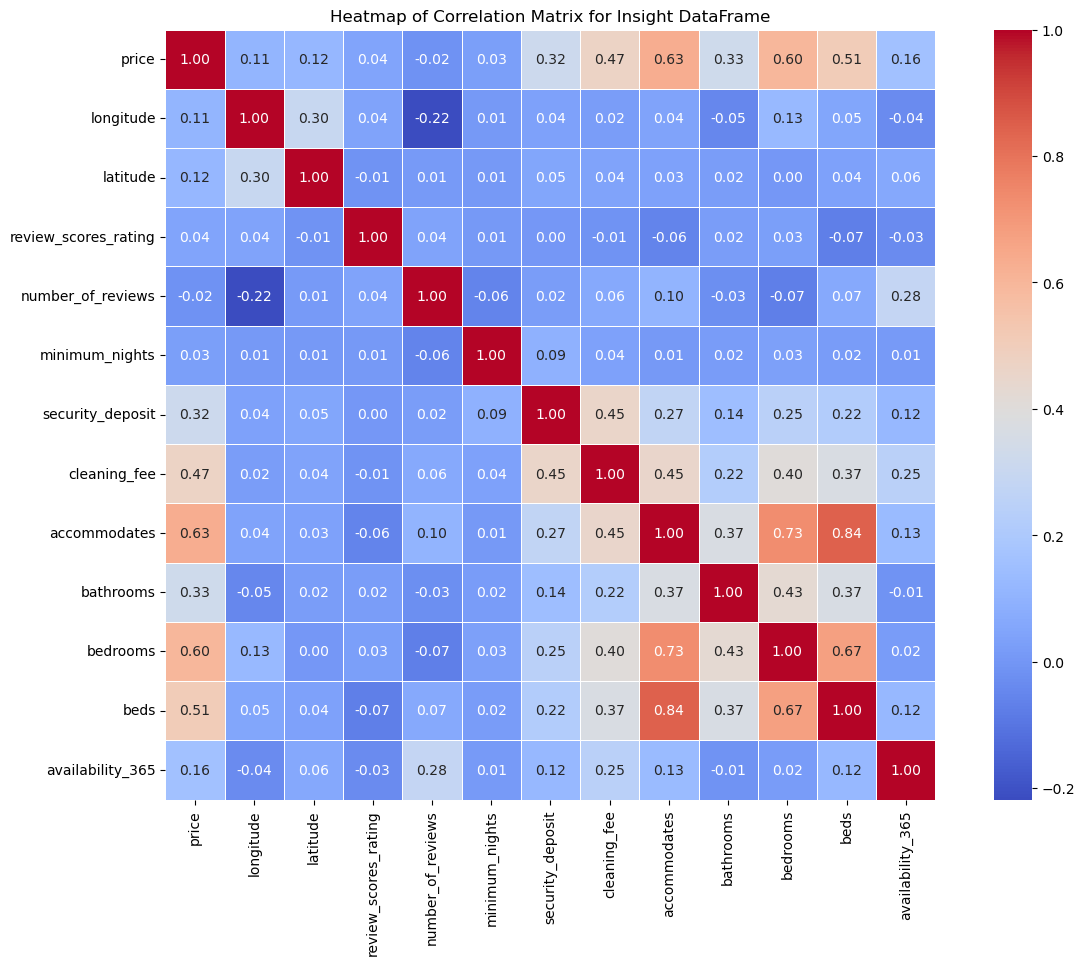

In [69]:
# Vẽ heat map
plt.figure(figsize=(15, 10))  # Thiết lập kích thước ảnh
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)  # Annot để hiển thị giá trị tương quan trên biểu đồ
plt.title('Heatmap of Correlation Matrix for Insight DataFrame')  # Tiêu đề biểu đồ
plt.show()

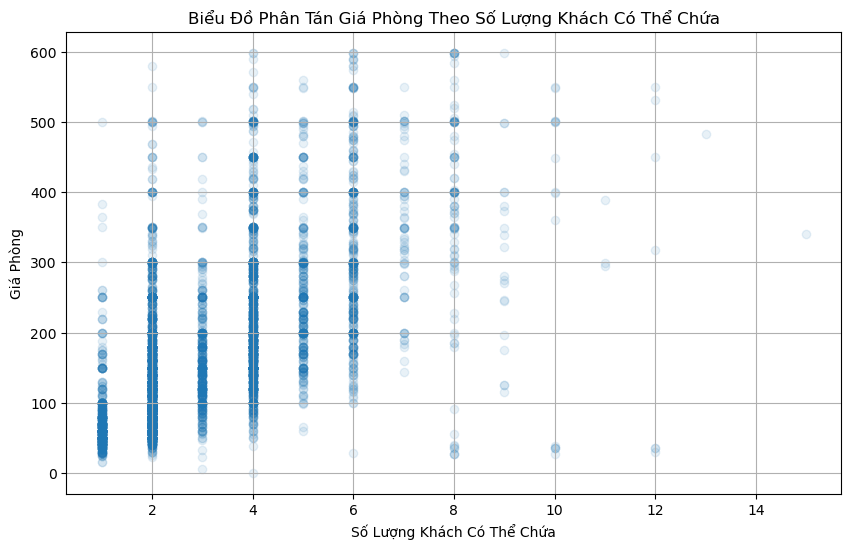

In [70]:
# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(insight['accommodates'], insight['price'], alpha=0.1)
plt.title('Biểu Đồ Phân Tán Giá Phòng Theo Số Lượng Khách Có Thể Chứa')
plt.xlabel('Số Lượng Khách Có Thể Chứa')
plt.ylabel('Giá Phòng')
plt.grid(True)

In [71]:
plt.show()

##  Tính toán thêm trên dữ liệu để thu được những thông tin có thể hữu ích trong việc phân tích và đưa ra quyết định

In [72]:
# Tính toán số phòng ngủ trên mỗi người, giúp phân tích hiệu quả sử dụng không gian
strat_train_set["bedrooms_per_person"] = strat_train_set["bedrooms"] / strat_train_set["accommodates"]

In [73]:
# Tính toán số phòng tắm trên mỗi người, hữu ích cho việc đánh giá tiện nghi
strat_train_set["bathrooms_per_person"] = strat_train_set["bathrooms"] / strat_train_set["accommodates"]

In [74]:
# Chuyển đổi cột 'host_since' từ chuỗi sang kiểu datetime để tiện xử lý ngày tháng
strat_train_set['host_since'] = pd.to_datetime(strat_train_set['host_since'])

In [75]:
# Tính toán số ngày từ khi người dùng trở thành host cho đến ngày hiện tại
# điều này giúp phân tích sự kinh nghiệm của người cho thuê
strat_train_set['days_on_airbnb'] = (pd.to_datetime('today') - strat_train_set['host_since']).dt.days

In [76]:
strat_train_set

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,200.0,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,...,House,Entire home/apt,127,t,f,2016-01-22,moderate,0.500000,0.250000,3239.0
1267,183.0,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,...,Apartment,Private room,0,t,f,2014-03-28,moderate,0.500000,0.500000,3904.0
6658,175.0,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,...,Apartment,Entire home/apt,0,t,f,2014-01-09,strict_14_with_grace_period,0.500000,0.500000,3982.0
2522,85.0,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,...,Apartment,Private room,90,f,f,2015-11-22,flexible,0.500000,0.500000,3300.0
722,80.0,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,...,Apartment,Private room,0,t,f,2014-01-07,strict_14_with_grace_period,0.333333,0.333333,3984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,700.0,Coogee,151.248745,-33.922954,100.0,1,5,500.0,100.0,8,...,House,Entire home/apt,0,f,f,2017-03-24,strict_14_with_grace_period,0.500000,0.250000,2812.0
3500,501.0,North Bondi,151.276397,-33.882302,100.0,2,5,500.0,200.0,8,...,House,Entire home/apt,0,t,f,2016-01-15,flexible,0.375000,0.375000,3246.0
485,119.0,Bondi,151.260641,-33.891914,96.0,7,5,250.0,30.0,2,...,Apartment,Private room,187,t,f,2013-03-11,moderate,0.500000,0.500000,4286.0
3146,111.0,Manly,151.281315,-33.792815,NaN,0,1,0.0,50.0,2,...,Apartment,Private room,364,f,f,2015-07-01,strict_14_with_grace_period,0.500000,0.500000,3444.0


## Xây dựng pipline

In [77]:
# Tính toán cột 'days_since_hosted' và loại bỏ cột không cần thiết
for dataset in [X_train, X_test]:
    dataset["days_since_hosted"] = (pd.to_datetime("today") - dataset["host_since"]).dt.days
    dataset.drop(columns=["host_since"], inplace=True)  # Loại bỏ cột 'host_since'

In [78]:
# Cấu hình cột số và cột phân loại
numeric_columns = ["longitude", "latitude", "review_scores_rating", "number_of_reviews",
                   "minimum_nights", "security_deposit", "cleaning_fee", 
                   "accommodates", "bathrooms", "bedrooms", "beds", "availability_365", "days_since_hosted"]

categorical_columns = ["city", "property_type", "room_type", "cancellation_policy",
                       "host_identity_verified", "host_is_superhost"]

In [79]:
# Pipeline xử lý cột số
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Điền giá trị thiếu bằng trung vị
    ("scaler", StandardScaler())  # Chuẩn hóa dữ liệu
])

In [80]:
# Pipeline xử lý cột phân loại
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Điền giá trị thiếu bằng giá trị phổ biến nhất
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Mã hóa OneHotEncoder
])

In [81]:
# Kết hợp cả hai pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),  # Áp dụng cho cột số
        ("cat", categorical_transformer, categorical_columns)  # Áp dụng cho cột phân loại
    ]
)

In [82]:
# Tạo pipeline cuối cùng
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Gọi bộ xử lý dữ liệu
])

In [83]:
# Áp dụng pipeline cho X_train và X_test
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [84]:
# Kiểm tra dữ liệu sau khi xử lý với pipeline
print("Dữ liệu trước xử lý:")
print(X_train.head())

# Chạy pipeline xử lý dữ liệu
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Kiểm tra kích thước và kiểu dữ liệu sau khi xử lý
print("Dữ liệu sau xử lý (X_train_processed):")
print(X_train_processed.shape)
print(type(X_train_processed))


Dữ liệu trước xử lý:
          city   longitude   latitude  review_scores_rating  \
5484   Newtown  151.178552 -33.907150                  96.0   
1267  Randwick  151.249030 -33.906190                  97.0   
6658     Manly  151.288491 -33.802074                 100.0   
2522  Randwick  151.236423 -33.913614                  94.0   
722     Coogee  151.259342 -33.918435                  92.0   

      number_of_reviews  minimum_nights  security_deposit  cleaning_fee  \
5484                 61               2             250.0          85.0   
1267                  6               4               0.0          20.0   
6658                  2               2               0.0          40.0   
2522                 20               3               0.0           0.0   
722                 139              30               0.0           0.0   

      accommodates  bathrooms  bedrooms  beds property_type        room_type  \
5484             4        1.0       2.0   2.0         House  Entire h

In [85]:
# Kiểm tra nhãn mục tiêu y_train
print("Kiểm tra kiểu dữ liệu của y_train:", type(y_train))
print("Các giá trị không hợp lệ trong y_train:")
print(y_train[~y_train.apply(lambda x: isinstance(x, (int, float)))])

# Kiểm tra giá trị NaN
print("Số lượng giá trị NaN trong y_train:", y_train.isnull().sum())

Kiểm tra kiểu dữ liệu của y_train: <class 'pandas.core.series.Series'>
Các giá trị không hợp lệ trong y_train:
Series([], Name: price, dtype: float64)
Số lượng giá trị NaN trong y_train: 0


In [86]:
# Loại bỏ giá trị NaN nếu có
y_train = y_train.fillna(0)

# Chuyển đổi nhãn mục tiêu thành số thực
y_train = y_train.astype(float)

In [87]:
# In thông tin kích thước dữ liệu sau xử lý
print("Shape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

Shape of processed X_train: (6485, 46)
Shape of processed X_test: (1622, 46)


## Chạy mô hình dự đoán

In [137]:
# Khởi tạo các mô hình
linear_model = LinearRegression()  # Mô hình Hồi quy tuyến tính
random_forest_model = RandomForestRegressor(random_state=42)  # Mô hình Rừng ngẫu nhiên

In [138]:
# Huấn luyện mô hình Hồi quy tuyến tính
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [139]:
# Dự đoán với mô hình hồi quy tuyến tính
y_pred_linear = linear_model.predict(X_test_processed)

In [140]:
# Huấn luyện mô hình Rừng ngẫu nhiên
random_forest_model.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [141]:
# Dự đoán với mô hình Rừng ngẫu nhiên
y_pred_rf = random_forest_model.predict(X_test_processed)

In [142]:
# Đánh giá mô hình
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [143]:
# In kết quả
print(f"Linear Regression - RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

Linear Regression - RMSE: 99.95, MAE: 65.37
Random Forest - RMSE: 98.67, MAE: 59.64


In [144]:
print(f"Linear Regression - RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

Linear Regression - RMSE: 99.95, MAE: 65.37
Random Forest - RMSE: 98.67, MAE: 59.64


## Tối ưu hóa mô hình bằng Grid Search

In [145]:
# Định nghĩa không gian tham số cho GridSearchCV
param_grid = [
    # Cố gắng 12 (3×4) kết hợp siêu tham số
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Thử thêm 6 (2×3) kết hợp với bootstrap = False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [146]:
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

In [147]:
# Huấn luyện mô hình với GridSearchCV sử dụng X_train_processed và y_train
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [148]:
# Xem các tham số tốt nhất và mô hình tốt nhất
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Estimator: {grid_search.best_estimator_}")

Best Parameters: {'max_features': 8, 'n_estimators': 30}
Best Estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [149]:
# Xem kết quả của tất cả các kết hợp tham số
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

123.42726541720039 {'max_features': 2, 'n_estimators': 3}
108.03110937552529 {'max_features': 2, 'n_estimators': 10}
104.03709532297626 {'max_features': 2, 'n_estimators': 30}
119.49131625130997 {'max_features': 4, 'n_estimators': 3}
105.64068665627342 {'max_features': 4, 'n_estimators': 10}
101.1965925178529 {'max_features': 4, 'n_estimators': 30}
119.58592190654663 {'max_features': 6, 'n_estimators': 3}
104.73895990717298 {'max_features': 6, 'n_estimators': 10}
100.54551414986184 {'max_features': 6, 'n_estimators': 30}
117.52924755060924 {'max_features': 8, 'n_estimators': 3}
104.8440630896683 {'max_features': 8, 'n_estimators': 10}
100.05202714094513 {'max_features': 8, 'n_estimators': 30}
120.8253222736327 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
108.41042180481647 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
122.2216049998823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
106.41314894764648 {'bootstrap': False, 'max_features': 3, 'n_est

In [150]:
# Đánh giá mô hình tốt nhất trên tập kiểm tra
final_predictions = grid_search.best_estimator_.predict(X_test_processed)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)

In [151]:
print(f"RMSE: {final_rmse}")
print(f"MAE: {final_mae}")

RMSE: 95.83775844314037
MAE: 57.979135106570375


## Dự đoán giá cho thuê theo tiêu chí đã được lựa

In [152]:
# Chuyển dictionary thành DataFrame
client_df = pd.DataFrame([dict_client])

In [153]:
# Kiểm tra các cột trong client_df
print("Các cột trong client_df:", client_df.columns)

Các cột trong client_df: Index(['city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'property_type',
       'room_type', 'availability_365', 'host_identity_verified',
       'host_is_superhost', 'cancellation_policy', 'host_since'],
      dtype='object')


In [154]:
# Đảm bảo các cột cần thiết đã có trong client_df
client_df["days_since_hosted"] = (pd.to_datetime("today") - pd.to_datetime(client_df["host_since"])).dt.days
client_df.drop(columns=["host_since"], inplace=True)  # Loại bỏ cột 'host_since' sau khi tính toán

In [155]:
# Áp dụng các bước xử lý dữ liệu (preprocessing) cho dữ liệu khách hàng
client_processed = pipeline.transform(client_df)

In [156]:
# Dự đoán giá thuê cho khách hàng
predicted_price = grid_search.best_estimator_.predict(client_processed)[0]

In [157]:
# In kết quả dự đoán
print(f"Predicted Rental Price: {predicted_price:.2f}")

Predicted Rental Price: 834.20


## Đánh giá các yếu tố quan trọng ảnh hưởng tới giá của BĐS được cho thuê

In [158]:
# Lấy danh sách các tên đặc trưng từ pipeline
feature_names = (
    numeric_columns 
    + list(preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_columns))
)

In [159]:
# Đánh giá tầm quan trọng của các đặc trưng
importances = grid_search.best_estimator_.feature_importances_

In [160]:
# Sắp xếp các đặc trưng theo tầm quan trọng
sorted_indices = np.argsort(importances)[::-1]

In [161]:
# In top 10 đặc trưng quan trọng nhất
print("Top 10 Important Features:")
for i in range(10):
    print(f"{feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]:.4f}")

Top 10 Important Features:
accommodates: 0.1206
bathrooms: 0.1158
bedrooms: 0.1147
beds: 0.1122
security_deposit: 0.0555
cleaning_fee: 0.0554
longitude: 0.0534
room_type_Entire home/apt: 0.0527
latitude: 0.0414
days_since_hosted: 0.0389


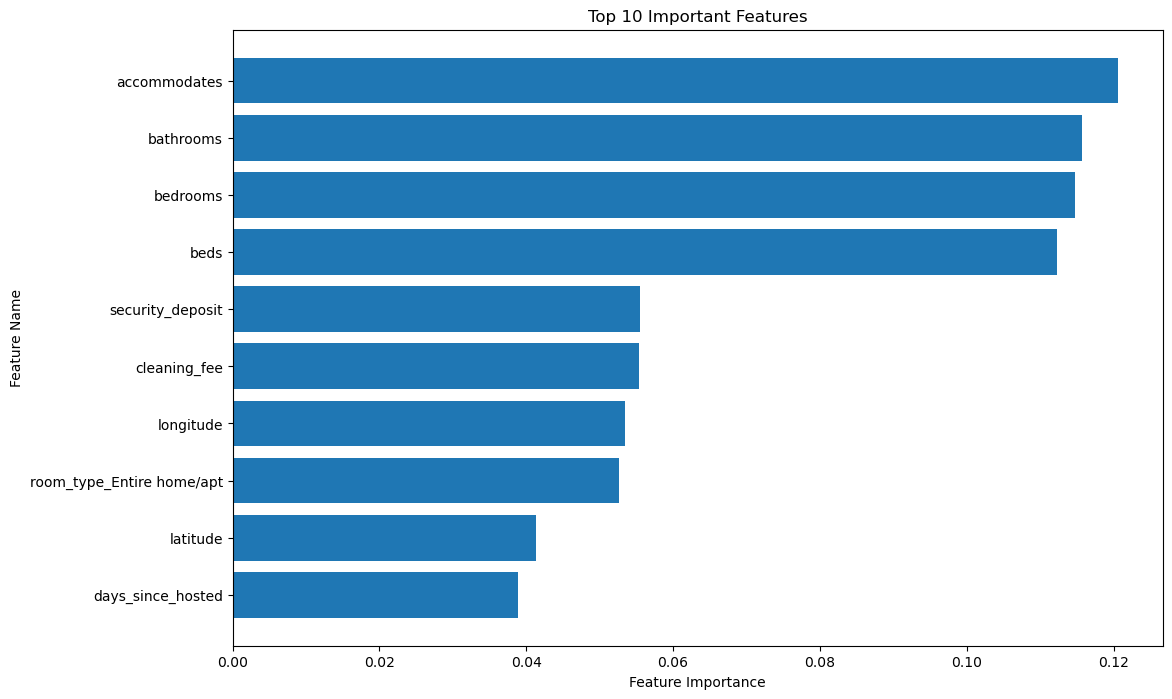

In [162]:
# Trực quan hóa tầm quan trọng của các đặc trưng
plt.figure(figsize=(12, 8))
plt.barh([feature_names[i] for i in sorted_indices[:10]], importances[sorted_indices[:10]], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()